# Kelly Fomula

Due  August 26th by 10:00 am.

Yuan Yao (s2259521)

## 0. Setup

In [ ]:
import pandas as pd
import seaborn as sns

# Data libraries
import numpy as np
import scipy
import scipy.stats as stats

# Plotting libraries
import matplotlib.pyplot as plt

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [ ]:
mu = 0.1
r = 0.02
sigma = 0.30

## 3. GBM Stimulation

\begin{equation}
dS_t=\mu S_tdt+\sigma S_tdW_t
\end{equation}
\begin{equation}
S_{t+\Delta t}=S_te^{(\mu-\frac{1}{2}\sigma^2)\Delta t+\sigma\sqrt{t}z}
\end{equation}
where $z$ is a standard normal distribution

In [ ]:
def simulation(S, mu, sigma, I, steps, plotpath = False, plothist = False):
    """
    :param S: initial price
    :param mu: drift
    :param T: duration（year）
    :param sigma: volatility
    :param I: path
    :param steps: 
    :param plotpath:
    :param plothist:
    :return:
    """
    delta_t = 1/252
    Spath = np.zeros((steps + 1, I))
    Spath[0] = S

    for t in range(1, steps + 1):
        z = np.random.standard_normal(I)
        middle1 = Spath[t-1, 0:I] * np.exp((mu - 0.5 * sigma ** 2) * delta_t + sigma * np.sqrt(delta_t) * z)
        uplimit = Spath[t-1] * 1.1
        lowlimit = Spath[t-1] * 0.9
        temp = np.where(uplimit < middle1, uplimit, middle1)
        temp = np.where(lowlimit > middle1, lowlimit, temp)
        Spath[t, 0:I] = temp

    if plotpath:
        plt.plot(Spath[:, :])
        # plt.plot([dn]*len(Spath))
        plt.xlabel('time')
        plt.ylabel('price')
        plt.title('Price Simulation')
        plt.grid(True)
        plt.show()
        plt.close()

    if plothist:
        plt.hist(Spath[int(steps)], bins=50)
        plt.title('final moment price Histogram')
        plt.show()
        plt.close()

    return Spath

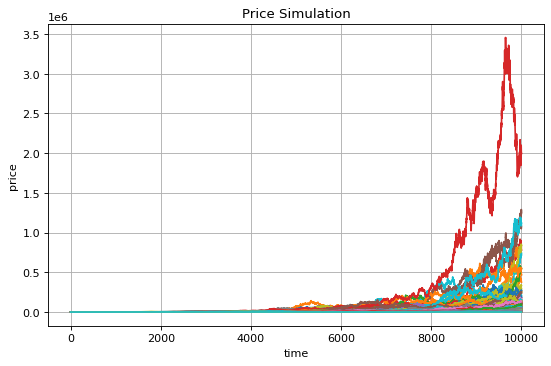

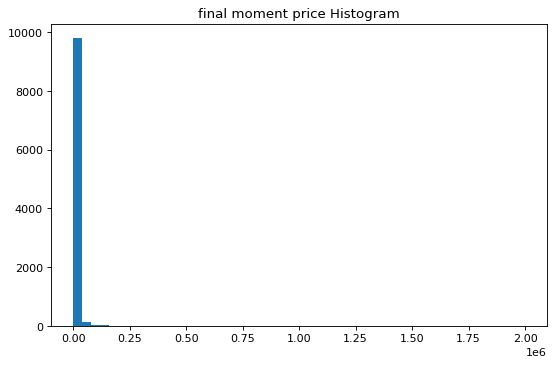

In [ ]:
price = simulation(S=100, mu=mu, sigma=sigma, I=10000, steps = 10000, plotpath = True, plothist = True)


In [ ]:
full_f = (mu-r)/(sigma**2)
quarter_f = full_f/4
half_f = full_f/2
double_f = full_f*2
triple_f = full_f*3

1. 100 trades

In [ ]:
fraction = []
log = []

In [ ]:
f = quarter_f
fraction.append(f)
steps = 100
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

101.56525041484676
4.619822018001381
18.14870348799771
3.067652064866295
0.10591215938766331
0.0
0.0
0.355
0.0
0.0
unavailable
unavailable


In [ ]:
f = half_f
fraction.append(f)
steps = 100
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

102.3389768581783
4.62477478292388
73.81556347139684
3.145249300676236
0.23391212687200869
0.0
0.0
0.4032
0.0
0.0
unavailable
unavailable


In [ ]:
f = full_f
fraction.append(f)
steps = 100
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)  
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

103.9016695328341
4.629394326894039
306.9384127273088
3.481562789044233
0.49450907151368606
0.0
0.0
0.4399
0.0
0.0
unavailable
unavailable


In [ ]:
f = double_f
fraction.append(f)
steps = 100
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)  
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

107.0847603986899
4.617476680232225
1355.926174171042
5.034406756347738
1.055720739719691
0.0
0.0183
0.4842
0.036
0.0
75.30555555555556
unavailable


In [ ]:
f = triple_f
fraction.append(f)
steps = 100
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

110.33943214215962
4.577243212596247
3469.0287909820104
8.375549473801538
1.7161529481681896
0.0
0.0945
0.5184
0.1375
0.0038
64.8829090909091
82.97368421052632


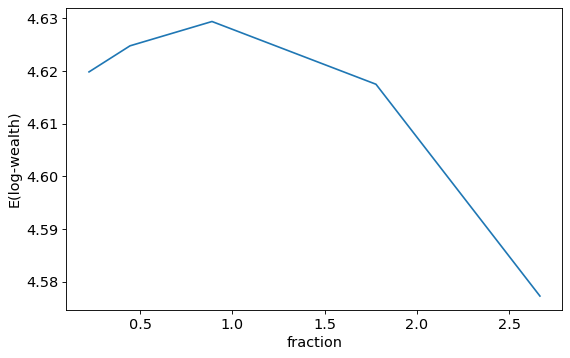

In [ ]:
plt.plot(fraction, log)
plt.xlabel('fraction',fontsize=13)
plt.ylabel('E(log-wealth)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

2. 1000 trades

In [ ]:
log = []

In [ ]:
f = quarter_f
steps = 1000
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

116.23020523225019
4.74679462995369
238.2987125814697
3.154982336322782
0.3486689811094007
0.0
0.0
0.1467
0.0
0.0
unavailable
unavailable


In [ ]:
f = half_f
steps = 1000
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)  
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

124.76783954036006
4.791422926436079
1119.4177992713378
3.933642460180473
0.754227700465191
0.0
0.0006
0.2424
0.0414
0.0
807.1256038647343
unavailable


In [ ]:
f = full_f
steps = 1000
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

143.63209972612756
4.827801338246853
6477.4228702343335
8.171367165154717
1.712174600357551
0.0
0.0412
0.3378
0.3102
0.0217
616.2021276595744
802.6543778801844


In [ ]:
f = double_f
steps = 1000
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

188.84773253108568
4.688903322221358
65430.95518196684
50.8853690373095
5.113715511621707
0.0125
0.2323
0.4659
0.5372
0.2094
403.7125837676843
618.9297994269341


In [ ]:
f = triple_f
steps = 1000
I = 10000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

243.4077846537662
4.266700703244395
456181.5114291784
258.620029695595
12.323776289161268
0.1106
0.4096
0.5797
0.5942
0.3112
297.38926287445304
489.9456940874036


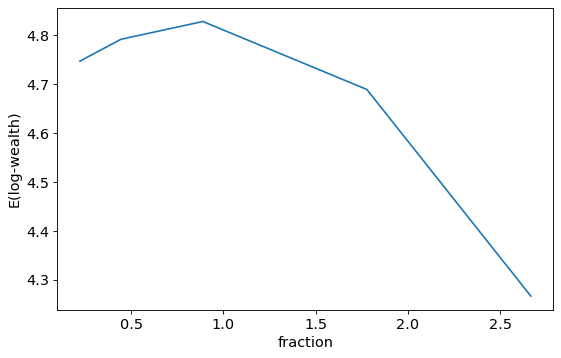

In [ ]:
plt.plot(fraction, log)
plt.xlabel('fraction',fontsize=13)
plt.ylabel('E(log-wealth)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

3. 10000 trades

In [ ]:
log = []

In [ ]:
f = quarter_f
steps = 10000
I = 1000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)  
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

446.4197028460943
6.011223125773812
38360.874425617614
4.6216949295240894
1.1347513261245912
0.0
0.0
0.0
0.976
0.555
4776.205942622951
7846.29009009009


In [ ]:
f = half_f
steps = 10000
I = 1000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)  
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

900.8392592468258
6.44724481318584
734956.3711528492
13.576613683031805
2.588185289520154
0.0
0.001
0.01
0.965
0.791
3401.158549222798
5955.881163084703


In [ ]:
f = full_f
steps = 10000
I = 1000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

3455.830037399355
6.790283719770283
75482727.43175504
98.61157766761164
8.01479763476
0.002
0.049
0.108
0.942
0.819
2283.4575371549895
4116.720390720391


In [ ]:
f = double_f
steps = 10000
I = 1000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   # 陡峭度
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

23813.002618248323
5.3588236790557495
47713298858.341736
481.9468124525014
20.33951856097024
0.184
0.341
0.425
0.871
0.725
1470.8461538461538
2681.826206896552


In [ ]:
f = triple_f
steps = 10000
I = 1000
final = []
time_2 = []
num_2 = 0
time_4 = []
num_4 = 0
num_1 = 0
num_half = 0
num_tithe = 0
initial = 100.000000
for i in range(I): 
  data = pd.DataFrame({'price':price[:steps+1,i]})
  data['returns'] = data['price'] / data['price'].shift(1)
  data['wealth'] = initial # Generates a new column for equity and sets the initial value to 1.
  for j in range(1,steps+1):
      data['wealth'][j] = data['wealth'][j-1]*(f*data['returns'][j]+(1-f)*(1+r/252))
  # print(data.tail(4))
  final.append(data['wealth'][steps])

  # judge if the final wealth less than the initial wealth / half of initial wealth / tithe of initial wealth
  if data['wealth'][steps] < 0.1*initial:
    num_tithe += 1
  if data['wealth'][steps] < 0.5*initial:
    num_half += 1
  if data['wealth'][steps] < initial:
    num_1 += 1

  # record the time to reach a setting goal 2-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 2*initial:
        time_2.append(j)
        num_2 +=1
        break
  # record the time to reach a setting goal 4-fold
  for j in range(1,steps+1):
      if data['wealth'][j] > 4*initial:
        time_4.append(j)
        num_4 +=1
        break

mean = sum(final)/len(final)
log_mean = sum(np.log(final))/len(final)
log.append(log_mean)
var = np.var(final)
kurt = stats.kurtosis(final, fisher=False)   # 陡峭度
skew = stats.skew(final)   
p_tithe = num_tithe/I
p_half = num_half/I
p_1 = num_1/I
p_2 = num_2/I
p_4 = num_4/I
if len(time_2) != 0:
  mean_time_2 = sum(time_2)/len(time_2)
else:
  mean_time_2 = 'unavailable'
if len(time_4) != 0:
  mean_time_4 = sum(time_4)/len(time_4)
else:
  mean_time_4 = 'unavailable'

print(mean)
print(log_mean)
print(var)
print(kurt)
print(skew)
print(p_tithe)
print(p_half)
print(p_1)
print(p_2)
print(p_4)
print(mean_time_2)
print(mean_time_4)

27603.470534485667
1.0927930779778883
216557724609.5479
719.3579161711377
25.794316683926407
0.601
0.714
0.75
0.785
0.604
934.3923566878981
1795.8990066225165


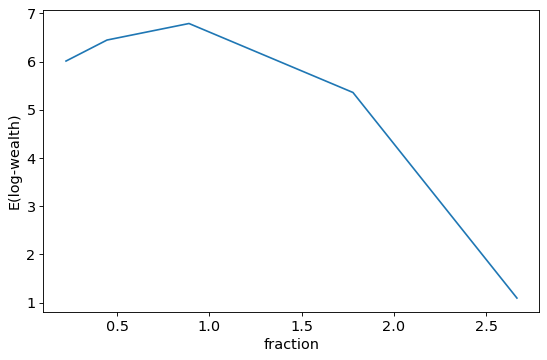

In [ ]:
plt.plot(fraction, log)
plt.xlabel('fraction',fontsize=13)
plt.ylabel('E(log-wealth)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()